***FINA 6339 \
Homework 3\
Xingzhi Mei***

In [274]:
# ALL Import Needed
import math as m
import statistics as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import yfinance as yf
import pandas_datareader as pdr
import requests_cache
session = requests_cache.CachedSession()
import scipy.optimize as sco
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [12]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format

### A1:

In [233]:
tickers = 'MSFT AAPL TSLA AMZN NVDA'

matana = (
    yf.download(tickers=tickers, progress=False)
    .assign(Date=lambda x: x.index.tz_localize(None))
    .set_index('Date')
    .rename_axis(columns=['Variable', 'Ticker'])
)

returns = matana['Adj Close'].pct_change().loc['2020':'2022']

The optimal weights for this portfolio to minimize portfolio variance is: [2.4995e-01 2.5356e-01 4.9648e-01 1.7553e-16 1.5396e-17]
The optimal weights for this portfolio to maximize portfolio variance is: [3.5910e-15 4.3345e-15 2.1230e-15 1.3323e-15 1.0000e+00]
The optimal weights for an equal level of risk contribution portfolio variance is: [-3.4107e-07  1.3000e+00  3.4107e-07  3.3052e-13 -3.0000e-01]


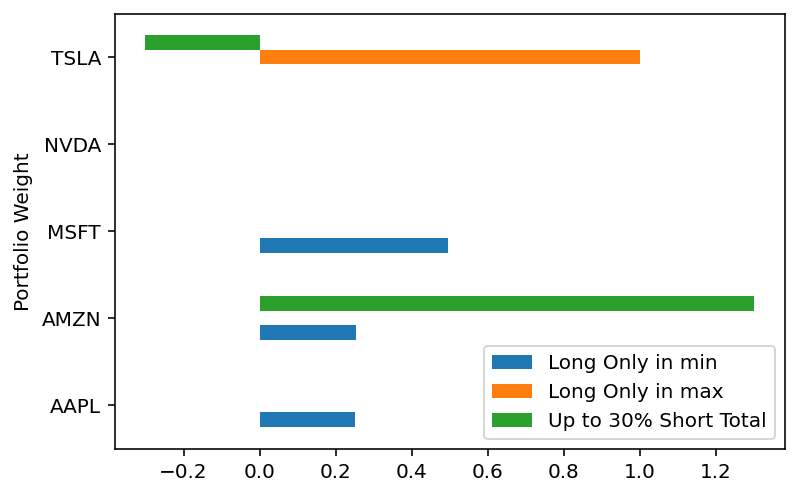

In [47]:
# Min
def port_vol_min(x, r, ppy):
    return np.sqrt(ppy) * r.dot(x).std()
# Max
def port_vol_max(x, r, ppy):
    return -1 * np.sqrt(ppy) * r.dot(x).std()
# Mean
def port_mean(x, r, ppy):
    return ppy * r.dot(x).mean()

# a
result_1 = sco.minimize(
    fun = port_vol_min,
    x0 = np.ones(returns.shape[1])/returns.shape[1],
    args=(returns,500),
    bounds=[(0,1) for _ in returns],
    constraints=(
        {'type':'eq','fun': lambda x: x.sum()-1}
    )
)
print('The optimal weights for this portfolio to minimize portfolio variance is: ' + str(result_1['x']))

# b
result_2 = sco.minimize(
    fun = port_vol_max,
    x0 = np.ones(returns.shape[1])/returns.shape[1],
    args=(returns,500),
    bounds=[(0,1) for _ in returns],
    constraints=(
        {'type':'eq','fun': lambda x: x.sum()-1},
    )
)
print('The optimal weights for this portfolio to maximize portfolio variance is: ' + str(result_2['x']))

# c do allow short of total weights up to 30%
result_3 = sco.minimize(
    fun = port_mean,
    x0 = np.ones(returns.shape[1])/returns.shape[1],
    args=(returns,500),
    bounds=[(-0.3,1.3) for _ in returns],
    constraints=(
        {'type':'eq','fun': lambda x: x.sum()-1},
        {'type': 'ineq', 'fun': lambda x: x[x<0].sum() + 0.3}
    )
)
print('The optimal weights for an equal level of risk contribution portfolio variance is: ' + str(result_3['x']))

pd.DataFrame(data={
            'Long Only in min':result_1['x'], 
            'Long Only in max':result_2['x'], 
            'Up to 30% Short Total':result_3['x']
        },index=returns.columns).rename_axis('Portfolio Weight').plot(kind='barh')
plt.show()

For finding the weight to minimize portfolio variance and maximize portfolio variance is simply minimize the postive port-variance and negative port-variance,by setting bound between 0 and 1 to not allow short happen. However it turns to equal risk contribution, do allow short of total weights of 30%. From the data, we can see that among the industries the tecenology companies did better in either minimize and maximize variance portfolio, although there is not a great increase in compines value, these companies shows their recovery trend to the market. as the company NVDA movenment is too small to dispaly in the graph, becasue of the chip shortage during pandemic and the restriction of cryptos among the world after pandemic. In equal risk contribution, there is a short in tsla and long in amzn, as amzn is being more stable and tsla is influence by the cryptos market as the CEO use shares to purchase bitcoin.

### A2:

The optimal weights for this portfolio to minimize portfolio variance is: [7.9441e-16 0.0000e+00 1.0000e+00 0.0000e+00 1.3878e-16]
The optimal weights for this portfolio to maximize portfolio variance is: [1.8319e-15 1.3739e-15 3.1225e-16 1.0000e+00 0.0000e+00]
The optimal weights for an equal level of risk contribution portfolio variance is: [-1.8587e-11  1.7783e-06  1.3000e+00 -3.0000e-01 -4.1084e-08]


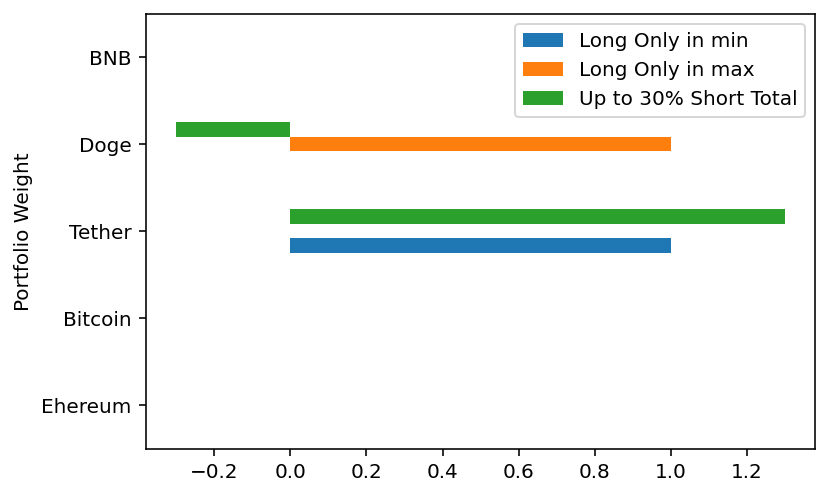

In [146]:
cry = pd.read_csv('cry.csv',header=[0, 1],index_col=0, parse_dates=True)
returns_2 = cry['Close'].pct_change().dropna()

# a
result_4 = sco.minimize(
    fun = port_vol_min,
    x0 = np.ones(returns_2.shape[1])/returns_2.shape[1],
    args=(returns_2,400),
    bounds=[(0,1) for _ in returns_2],
    constraints=(
        {'type':'eq','fun': lambda x: x.sum()-1},
    )
)
print('The optimal weights for this portfolio to minimize portfolio variance is: ' + str(result_4['x']))
# b
result_5 = sco.minimize(
    fun = port_vol_max,
    x0 = np.ones(returns_2.shape[1])/returns_2.shape[1],
    args=(returns_2,500),
    bounds=[(0,1) for _ in returns_2],
    constraints=(
        {'type':'eq','fun': lambda x: x.sum()-1},
    )
)
print('The optimal weights for this portfolio to maximize portfolio variance is: ' + str(result_5['x']))

# c do allow short of total weights up to 30%
result_6 = sco.minimize(
    fun = port_mean,
    x0 = np.ones(returns_2.shape[1])/returns_2.shape[1],
    args=(returns_2,500),
    bounds=[(-0.3,1.3) for _ in returns_2],
    constraints=(
        {'type':'eq','fun': lambda x: x.sum()-1},
        {'type': 'ineq', 'fun': lambda x: x[x<0].sum() + 0.3}
    )
)
print('The optimal weights for an equal level of risk contribution portfolio variance is: ' + str(result_6['x']))

pd.DataFrame(data={
            'Long Only in min':result_4['x'], 
            'Long Only in max':result_5['x'], 
            'Up to 30% Short Total':result_6['x']
        },index=returns_2.columns).rename_axis('Portfolio Weight').plot(kind='barh')
plt.show()

From the graph, we can see that crypto market is different comparing to the stock market. In the stock market, companies and investors usually invest in the large companies as they are more reliable. However, in the crypto market, people do not invest a lot in the popular cryptos as they are being more sensitive and easier to influence. People are used to invest in some cheap cryptos so that they won't lose a lot in crypto market. In the graph, the prorfolio weight of expensive cryptos are almost 0 and close to 0 in long position for both minimize portfolio variance and maximize portfolio variance. In the equal risk contribution, investors are still more willing to invest in cheap cryptos like Dogecoin and Tether. Cryptos markets are not easy to perdit compare to stock market, and it has been a increase trend becasue of SVB collapse. 

### A3:

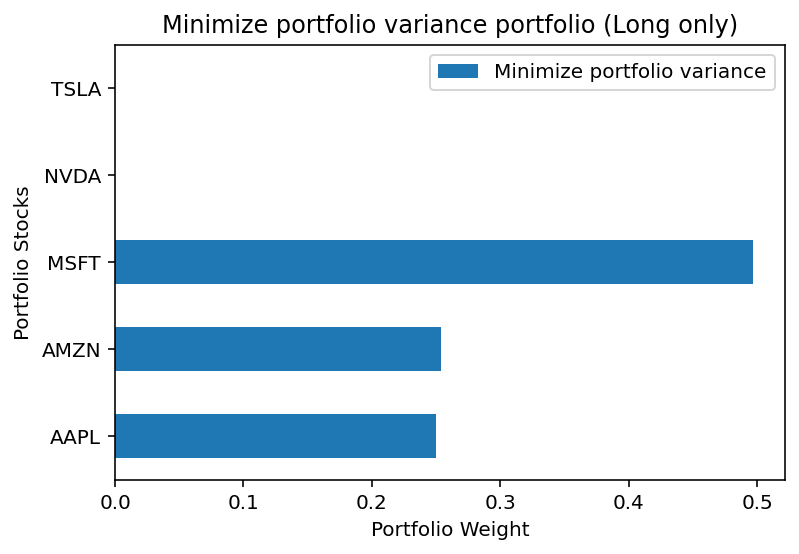

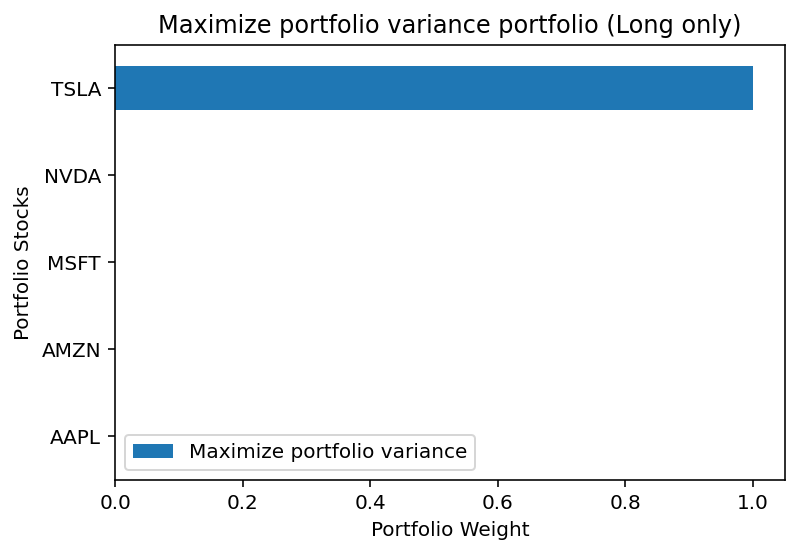

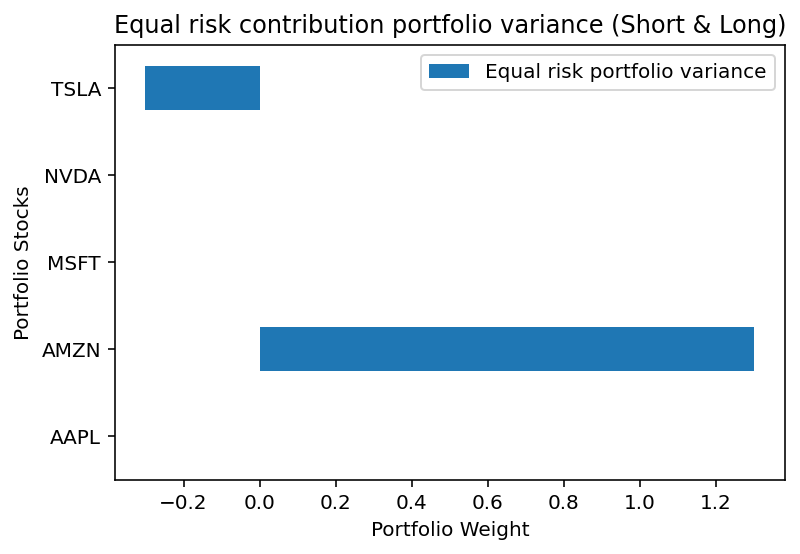

In [208]:
# a
# Long only
pd.DataFrame(data={
            'Minimize portfolio variance':result_1['x'], 
        },index=returns.columns).rename_axis('Portfolio Stocks').plot(kind='barh')
plt.title('Minimize portfolio variance portfolio (Long only)')
plt.xlabel('Portfolio Weight')
plt.show()

# Long only
pd.DataFrame(data={
            'Maximize portfolio variance':result_2['x'], 
        },index=returns.columns).rename_axis('Portfolio Stocks').plot(kind='barh')
plt.title('Maximize portfolio variance portfolio (Long only)')
plt.xlabel('Portfolio Weight')
plt.show()

# Long & Short
pd.DataFrame(data={
            'Equal risk portfolio variance':result_3['x'], 
        },index=returns.columns).rename_axis('Portfolio Stocks').plot(kind='barh')
plt.title('Equal risk contribution portfolio variance (Short & Long)')
plt.xlabel('Portfolio Weight')
plt.show()

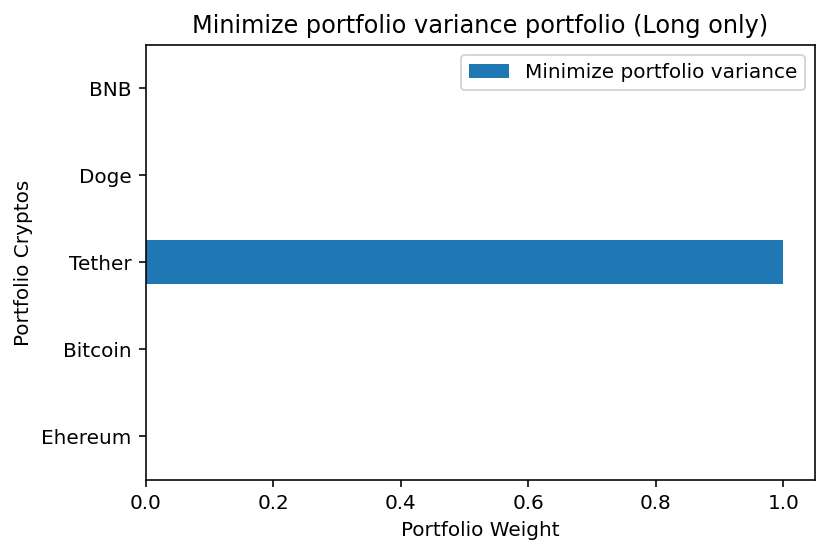

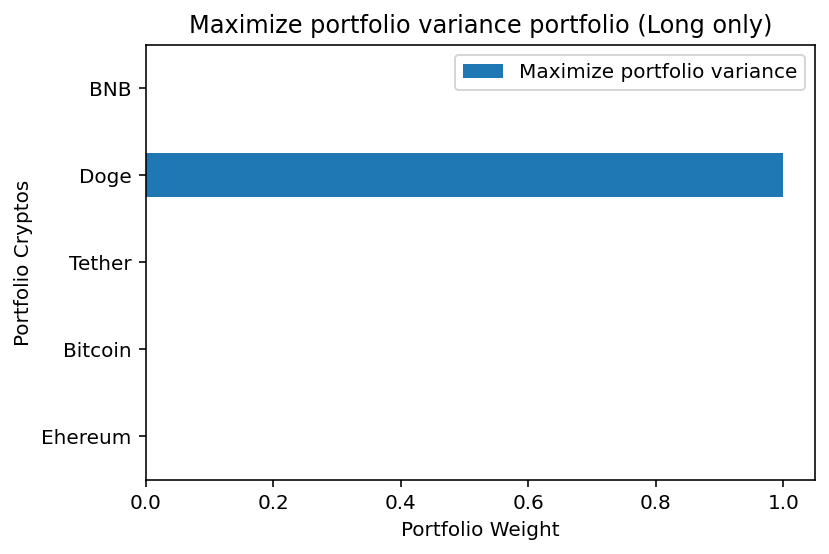

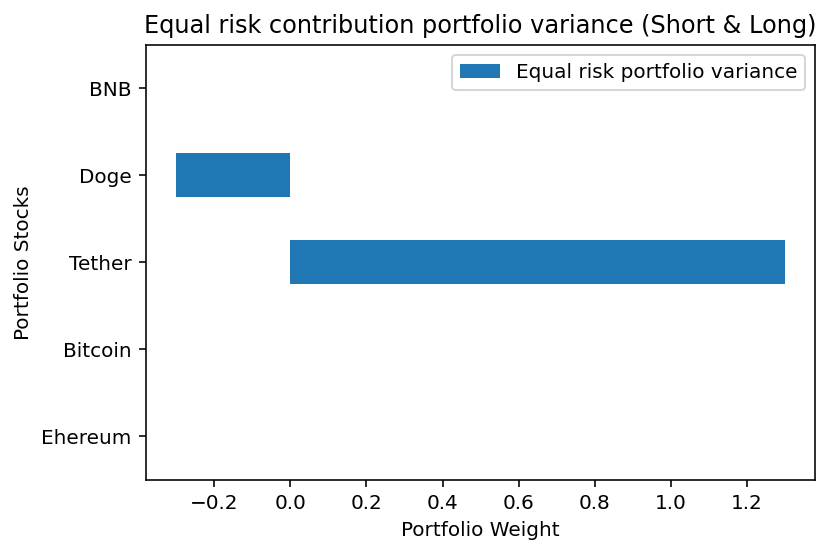

In [212]:
# b 
# Long only
pd.DataFrame(data={
            'Minimize portfolio variance':result_4['x'], 
        },index=returns_2.columns).rename_axis('Portfolio Cryptos').plot(kind='barh')
plt.title('Minimize portfolio variance portfolio (Long only)')
plt.xlabel('Portfolio Weight')
plt.show()

# Long only
pd.DataFrame(data={
            'Maximize portfolio variance':result_5['x'], 
        },index=returns_2.columns).rename_axis('Portfolio Cryptos').plot(kind='barh')
plt.title('Maximize portfolio variance portfolio (Long only)')
plt.xlabel('Portfolio Weight')
plt.show()

# Long & Short
pd.DataFrame(data={
            'Equal risk portfolio variance':result_6['x'], 
        },index=returns_2.columns).rename_axis('Portfolio Stocks').plot(kind='barh')
plt.title('Equal risk contribution portfolio variance (Short & Long)')
plt.xlabel('Portfolio Weight')
plt.show()


Difference between Minimize variance of stocks and cryptos is that the investors have different invest strategy, as the risk of stocks and cryptos is different. People are more likely to invest in big companies in stock market becasue they show a increase trend form their financial report. Investors are more likely to hold more position in small cryptos becasue they are cheap in investing and not huge floating in price. Difference of Maximize variance stock and cryptos is not obvious, and the common is that people used to hold a position in one stock when they are only allow to long, Equal risk contribution stock and cryptos have difference in investment and short long position, investors hold more longs in stock market and more shorts in crypto market, different invest strategy make people want holding more in big companies and shorting more in expensive cryptos.



### A4:

Q1 = 0.089w in Risky asset\
Q2 = 0.911w in Risk free asset

### B1:

In [275]:
# Close
returns_3 = matana['Close'].pct_change().loc['2020':'2022'].values

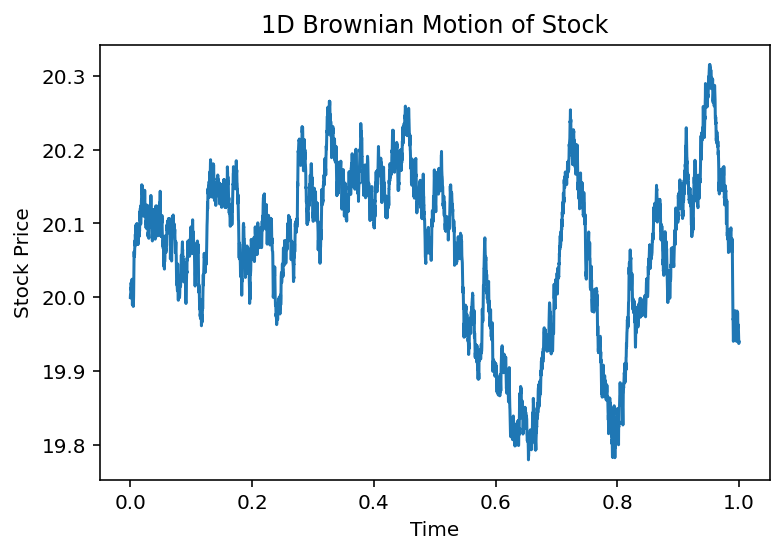

In [295]:
# 1
N = 5000 
T = 1.0 
dt = T/N 
mu = returns_3.mean().mean()
sigma = returns_3.std().mean()

t = np.linspace(0.0, T, N+1)
S = np.zeros(N+1)

# Set initial stock price
S[0] = 20

# generate Brownian motion
for i in range(1, N+1):
    S[i] = S[i-1]*np.exp((mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.normal())

# Plot the stock price over time
plt.plot(t, S)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('1D Brownian Motion of Stock')
plt.show()

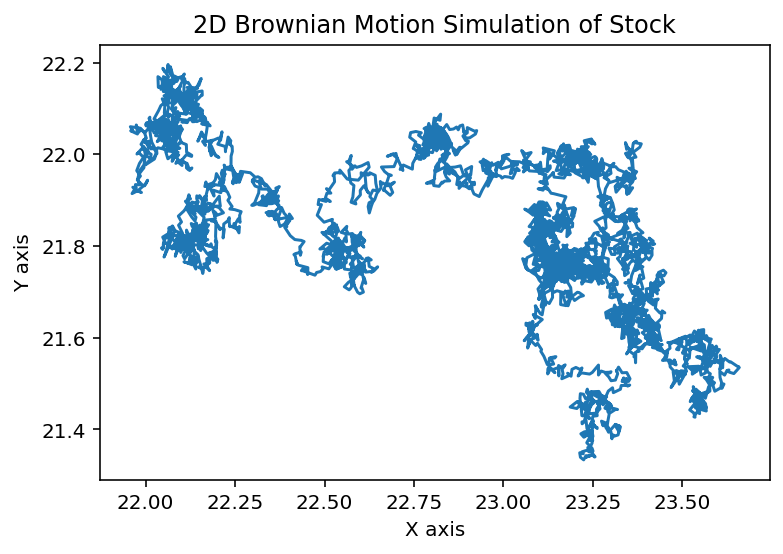

In [296]:
# 2
N = 5000
T = 1.0 
dt = T/N
mu = returns_3.mean().mean()
sigma = returns_3.std().mean()

x = np.zeros(N+1)
y = np.zeros(N+1)

# Initialize the starting values
x[0] = 22
y[0] = 22

# Simulate the 2D Brownian motion
for i in range(1, N+1):
    x[i] = x[i-1] + mu*x[i-1]*dt + sigma*x[i-1]*np.sqrt(dt)*np.random.normal()
    y[i] = y[i-1] + mu*y[i-1]*dt + sigma*y[i-1]*np.sqrt(dt)*np.random.normal()

# Plot the results
plt.plot(x, y)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('2D Brownian Motion Simulation of Stock')
plt.show()

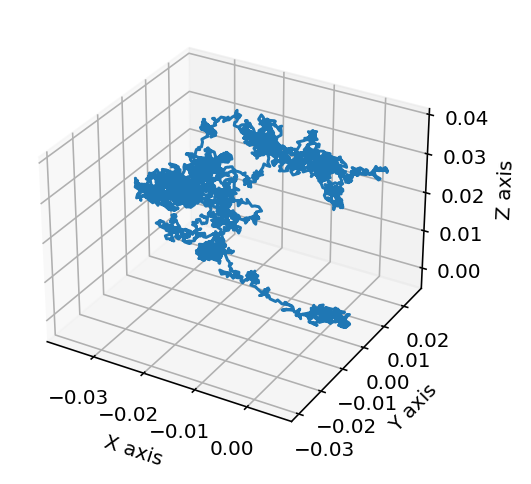

In [297]:
# 3
N = 5000
T = 1.0 
dt = T/N
sigma = returns_3.std().mean()

stock_price = np.zeros((N, 3))

# Generate the 3D Brownian motion
for i in range(1, N):
    # Compute the random increments
    dW = np.random.normal(0, np.sqrt(dt), size=3)
    # Compute the stock price increment
    dS = sigma * dW
    # Compute the new stock price
    stock_price[i,:] = stock_price[i-1,:] + dS

# Visualize the 3D Brownian motion
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(stock_price[:,0], stock_price[:,1], stock_price[:,2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

### B2:

In [327]:
ff = pd.read_csv('ff.csv', index_col='Date', parse_dates=True)

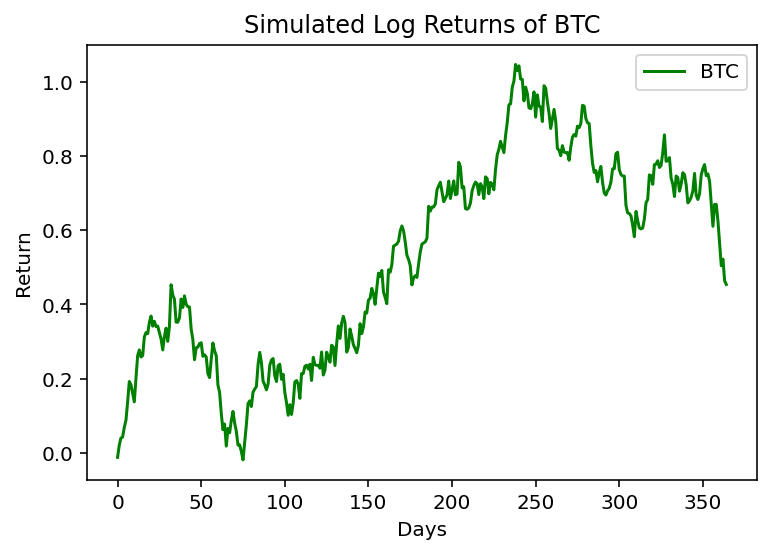

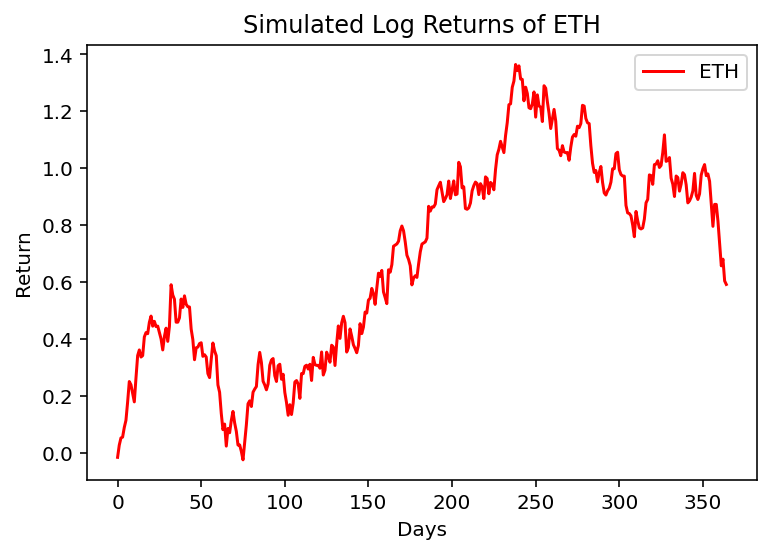

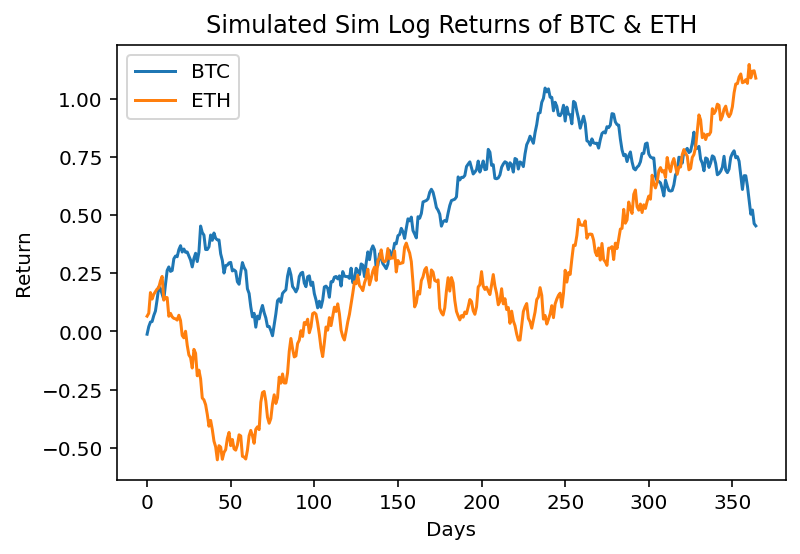

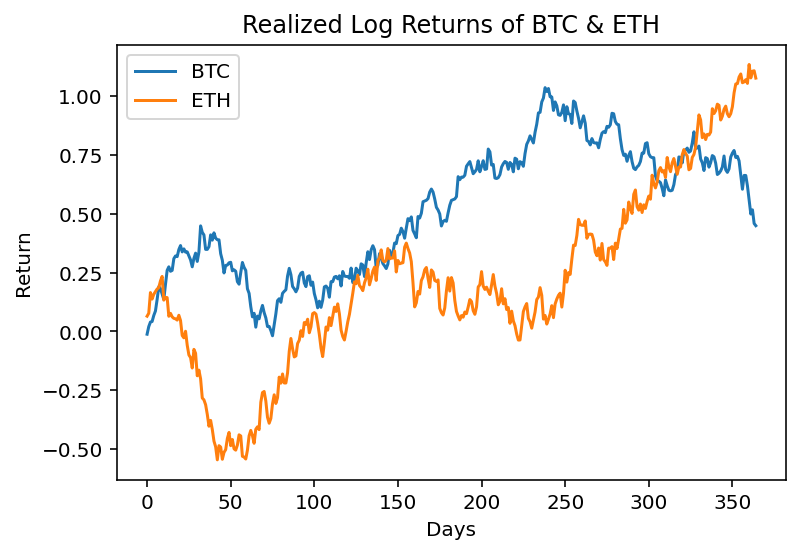

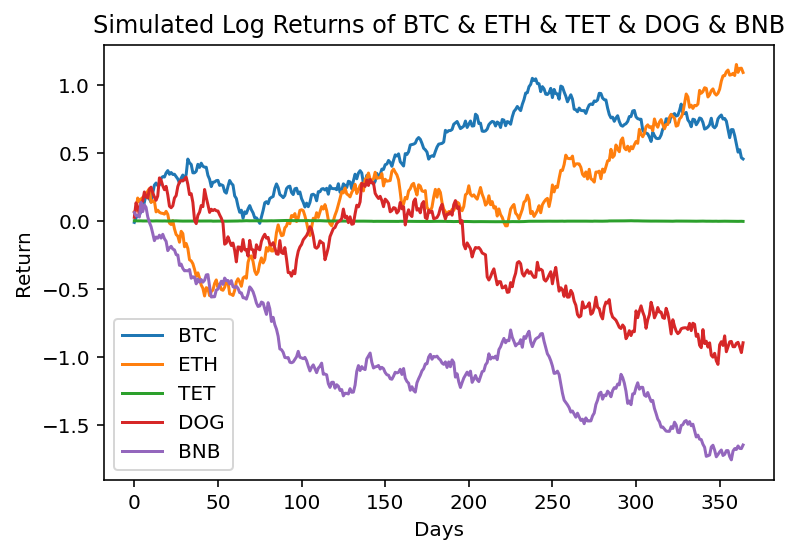

In [355]:
# a
r = ff['RF'].mean()  # risk-free rate
sigma_btc = returns_2['Bitcoin'].std()  # BTC volatility
S0_btc = 0.08  # BTC initial price
T = 365  
dt = 1 
N = T // dt 

np.random.seed(32)
z_btc = np.random.normal(size=N)
bm_btc = np.cumsum(z_btc) * np.sqrt(dt)

drift_btc = (r - 0.5 * sigma_btc ** 2) * dt
log_returns_btc = drift_btc + sigma_btc * bm_btc

plt.plot(log_returns_btc, label='BTC',color="g")
plt.title('Simulated Log Returns of BTC')
plt.xlabel('Days')
plt.ylabel('Return')
plt.legend()
plt.show()

# b
sigma_eth = returns_2['Ehereum'].std()  # ETH volatility
S0_eth = 10  # ETH initial price
T = 365  
dt = 1 
N = T // dt 

np.random.seed(32)
z_eth = np.random.normal(size=N)
bm_eth = np.cumsum(z_eth) * np.sqrt(dt)

drift_eth = (r - 0.5 * sigma_eth ** 2) * dt
log_returns_eth = drift_eth + sigma_eth * bm_eth

plt.plot(log_returns_eth, label='ETH', color="r")
plt.title('Simulated Log Returns of ETH')
plt.xlabel('Days')
plt.ylabel('Return')
plt.legend()
plt.show()

# c
# sim
sigma_btc = returns_2['Bitcoin'].std()  # BTC volatility
sigma_eth = returns_2['Ehereum'].std()  # ETH volatility
S0_btc = 0.08  # BTC initial price
S0_eth = 10  # ETH initial price
T = 365  
dt = 1 
N = T // dt 

np.random.seed(32)
z_btc = np.random.normal(size=N)
z_eth = np.random.normal(size=N)
bm_btc = np.cumsum(z_btc) * np.sqrt(dt)
bm_eth = np.cumsum(z_eth) * np.sqrt(dt)

drift_btc = (r - 0.5 * sigma_btc ** 2) * dt
drift_eth = (r - 0.5 * sigma_eth ** 2) * dt
log_returns_btc = drift_btc + sigma_btc * bm_btc
log_returns_eth = drift_eth + sigma_eth * bm_eth

plt.plot(log_returns_btc, label='BTC')
plt.plot(log_returns_eth, label='ETH')
plt.title('Simulated Sim Log Returns of BTC & ETH')
plt.xlabel('Days')
plt.ylabel('Return')
plt.legend()
plt.show()

# log
log = np.log(cry['Close']) - np.log(cry['Close'].shift(1))
sigma_btc = log['Bitcoin'].std()  # BTC volatility
sigma_eth = log['Ehereum'].std()  # ETH volatility
S0_btc = 0.08  # BTC initial price
S0_eth = 10  # ETH initial price
T = 365  
dt = 1 
N = T // dt 

np.random.seed(32)
z_btc = np.random.normal(size=N)
z_eth = np.random.normal(size=N)
bm_btc = np.cumsum(z_btc) * np.sqrt(dt)
bm_eth = np.cumsum(z_eth) * np.sqrt(dt)

drift_btc = (r - 0.5 * sigma_btc ** 2) * dt
drift_eth = (r - 0.5 * sigma_eth ** 2) * dt
log_returns_btc = drift_btc + sigma_btc * bm_btc
log_returns_eth = drift_eth + sigma_eth * bm_eth

plt.plot(log_returns_btc, label='BTC')
plt.plot(log_returns_eth, label='ETH')
plt.title('Realized Log Returns of BTC & ETH')
plt.xlabel('Days')
plt.ylabel('Return')
plt.legend()
plt.show()

# all five 
sigma_btc = returns_2['Bitcoin'].std()  # BTC volatility
sigma_eth = returns_2['Ehereum'].std()  # ETH volatility
sigma_tet = returns_2['Tether'].std()  # BTC volatility
sigma_dog = returns_2['Doge'].std()  # ETH volatility
sigma_bnb = returns_2['BNB'].std()  # BNB volatility
S0_btc = 0.08  # BTC initial price
S0_eth = 10  # ETH initial price
S0_tet = 0.08  # BTC initial price
S0_dog = 10  # ETH initial price
S0_bnb = 0.13 # BNB initial price
T = 365  
dt = 1 
N = T // dt 

np.random.seed(32)
z_btc = np.random.normal(size=N)
z_eth = np.random.normal(size=N)
z_tet = np.random.normal(size=N)
z_dog = np.random.normal(size=N)
z_bnb = np.random.normal(size=N)
bm_btc = np.cumsum(z_btc) * np.sqrt(dt)
bm_eth = np.cumsum(z_eth) * np.sqrt(dt)
bm_tet= np.cumsum(z_tet) * np.sqrt(dt)
bm_dog = np.cumsum(z_dog) * np.sqrt(dt)
bm_bnb = np.cumsum(z_bnb) * np.sqrt(dt)

drift_btc = (r - 0.5 * sigma_btc ** 2) * dt
drift_eth = (r - 0.5 * sigma_eth ** 2) * dt
drift_tet = (r - 0.5 * sigma_tet ** 2) * dt
drift_dog = (r - 0.5 * sigma_dog ** 2) * dt
drift_bnb = (r - 0.5 * sigma_bnb ** 2) * dt

log_returns_btc = drift_btc + sigma_btc * bm_btc
log_returns_eth = drift_eth + sigma_eth * bm_eth
log_returns_tet = drift_tet + sigma_tet * bm_tet
log_returns_dog = drift_dog + sigma_dog * bm_dog
log_returns_bnb = drift_bnb + sigma_bnb * bm_bnb

plt.plot(log_returns_btc, label='BTC')
plt.plot(log_returns_eth, label='ETH')
plt.plot(log_returns_tet, label='TET')
plt.plot(log_returns_dog, label='DOG')
plt.plot(log_returns_bnb, label='BNB')
plt.title('Simulated Log Returns of BTC & ETH & TET & DOG & BNB')
plt.xlabel('Days')
plt.ylabel('Return')
plt.legend()
plt.show()

From the graph, we can see that the return for Bitcoin and Ehereum are positive, people who invest in the cryptos increase around 8 to 9 percent in their total value. Bitcoin and Ethereum are both highly volatile assets, with substantial daily price swings. Realized log returns for these assets are likely to shift to the right, having bigger index, also means that extreme price swings are more common than would be expected under a normal distribution. However, it is hard to simulate the difference between returns of Bitcoin and Ethereum due to their complex and dynamic nature, the difference is hard to figure in the graph as they may only different in the thousandths. We plot all the crypto return together to see which one has the better return, although in the question A we say that people are more likely to invest in the small cryptos, the returns of bitcoin and ethereum are still the two highest return cryptos that we can invest. it might becasue many big investment companies hold position in these two expensive cryptos which control the price of these two.

### B3:

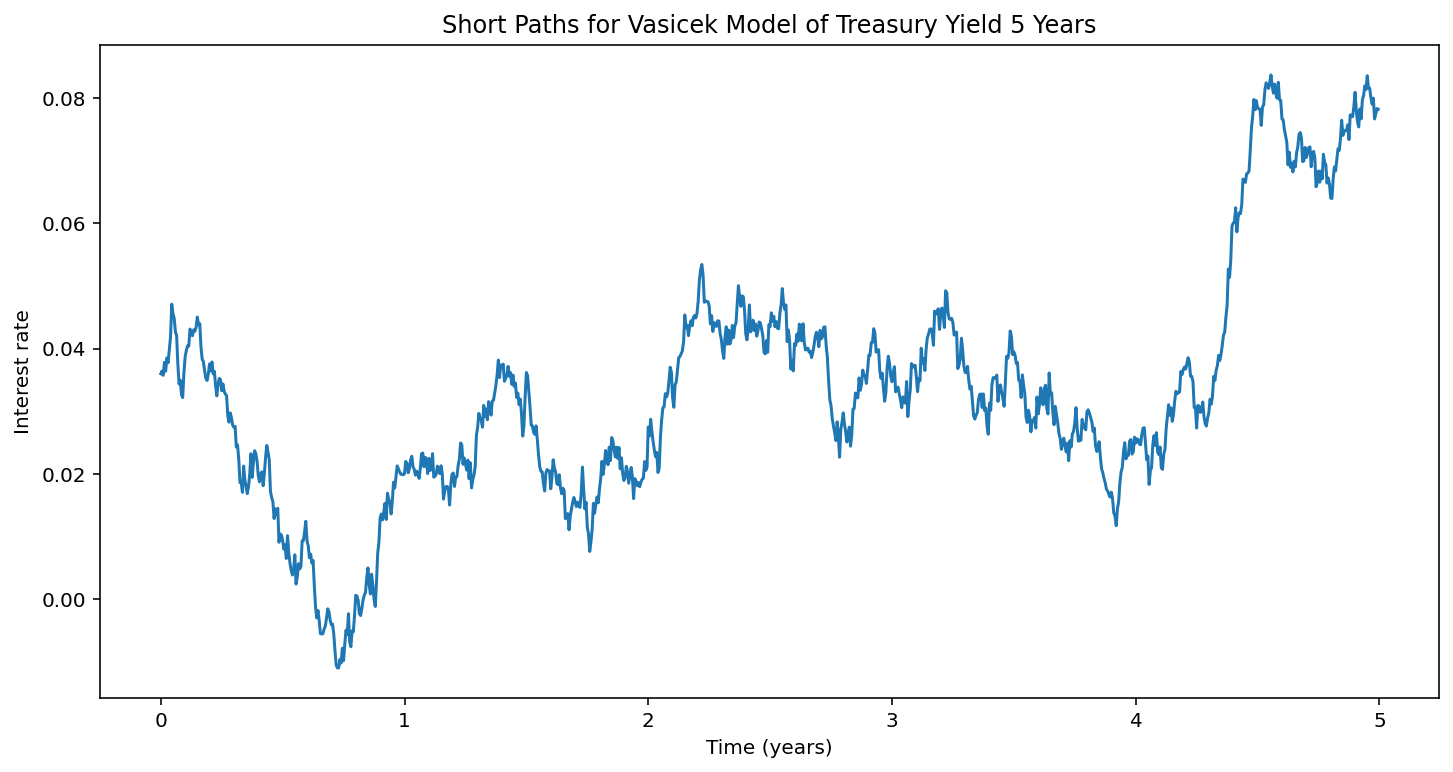

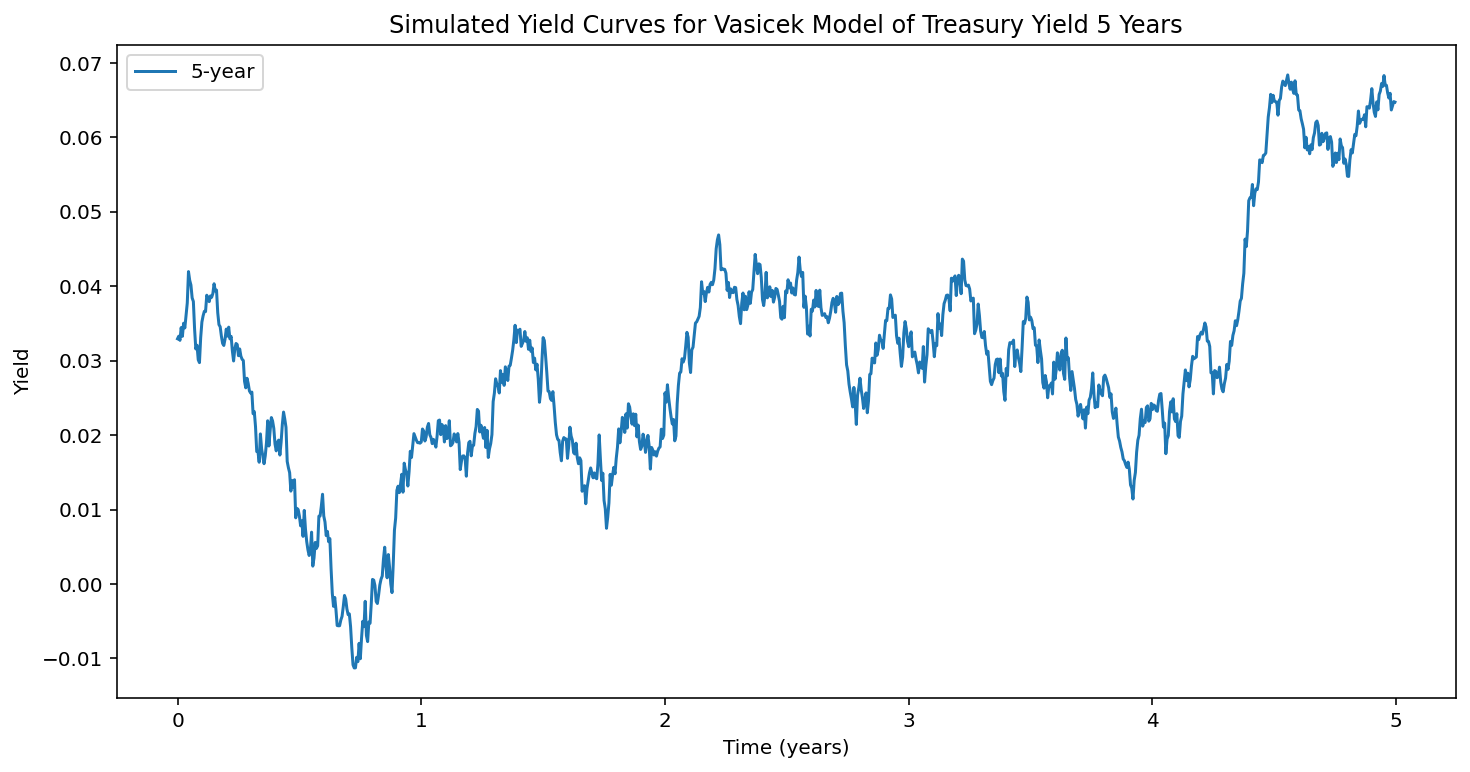

In [380]:
# Treasury Yield 5 Years
FVX = pd.read_csv('FVX.csv')
returns_fvx = FVX['Adj Close'].pct_change()
# time (years)
T = 5  
N = 1000 
dt = T / N 

r0 = 0.0360
theta = 0.0374
sigma = returns_fvx.std()
kappa = 0.1

# Simulate Vasicek model
r = np.zeros(N)
r[0] = r0
for i in range(1, N):
    dr = kappa * (theta - r[i-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
    r[i] = r[i-1] + dr

# Plot short paths
plt.figure(figsize=(12, 6))
plt.plot(np.arange(N) * dt, r)
plt.xlabel('Time (years)')
plt.ylabel('Interest rate')
plt.title('Short Paths for Vasicek Model of Treasury Yield 5 Years')
plt.show()

maturities = np.array([5])  # in years
num_maturities = len(maturities)
yield_curves = np.zeros((num_maturities, N))
for i in range(num_maturities):
    for j in range(N):
        yield_curves[i, j] = (1 / maturities[i]) * (1 - np.exp(-maturities[i] * r[j]))

# Plot yield curves
plt.figure(figsize=(12, 6))
for i in range(num_maturities):
    plt.plot(np.arange(N) * dt, yield_curves[i, :], label='{}-year'.format(int(maturities[i])))
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Yield')
plt.title('Simulated Yield Curves for Vasicek Model of Treasury Yield 5 Years')
plt.show()

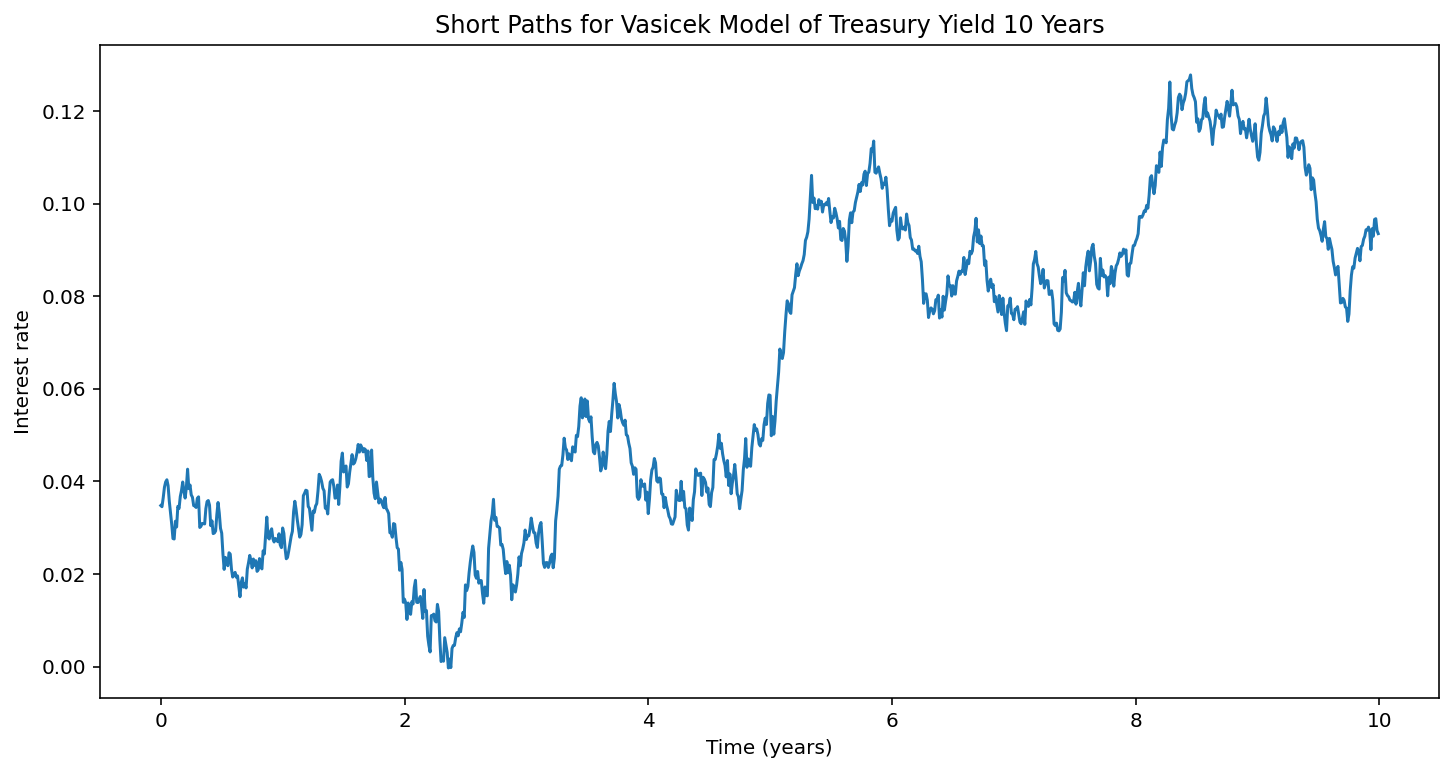

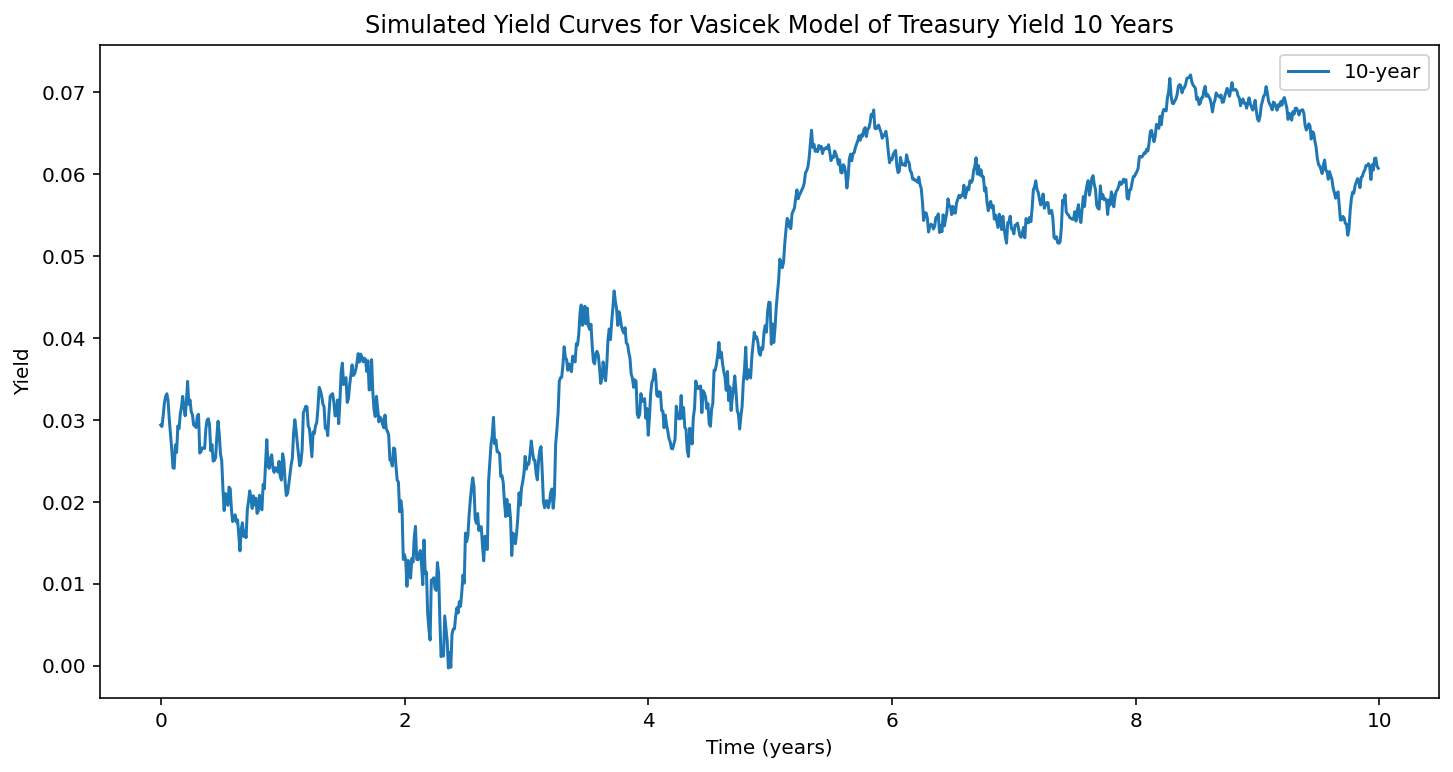

In [384]:
# Treasury Yield 10 Years
TNX = pd.read_csv('TNX.csv')
returns_tnx = TNX['Adj Close'].pct_change()
# time (years)
T = 10 
N = 1000 
dt = T / N 

r0 = 0.0348
theta = 0.0348
sigma = returns_tnx.std()
kappa = 0.1

# Simulate Vasicek model
r = np.zeros(N)
r[0] = r0
for i in range(1, N):
    dr = kappa * (theta - r[i-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()
    r[i] = r[i-1] + dr

# Plot short paths
plt.figure(figsize=(12, 6))
plt.plot(np.arange(N) * dt, r)
plt.xlabel('Time (years)')
plt.ylabel('Interest rate')
plt.title('Short Paths for Vasicek Model of Treasury Yield 10 Years')
plt.show()

maturities = np.array([10])  # in years
num_maturities = len(maturities)
yield_curves = np.zeros((num_maturities, N))
for i in range(num_maturities):
    for j in range(N):
        yield_curves[i, j] = (1 / maturities[i]) * (1 - np.exp(-maturities[i] * r[j]))

# Plot yield curves
plt.figure(figsize=(12, 6))
for i in range(num_maturities):
    plt.plot(np.arange(N) * dt, yield_curves[i, :], label='{}-year'.format(int(maturities[i])))
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Yield')
plt.title('Simulated Yield Curves for Vasicek Model of Treasury Yield 10 Years')
plt.show()

From the above plots, we should see an upward-sloping curve for both bonds, with the 10-year bond having a steeper slope than the 5-year bond due to its longer maturity. In the below graph, I calculate the price of each bonduse by using fomula: Price = (C / r) x [1 - 1 / (1 + r)^n] + FV / (1 + r)^n, which C is the annual coupon payment, r is the annual yield rate divided by the number of coupon payments per year, n is the total number of coupon payments, and FV is the face value of the bond. As the yield rate increases, the price of the bonds decreases, reflecting the inverse relationship between bond prices and yields. People and investment agents are not willing to buy long term bonds becasue of the fixed rate of interest over time which cannot keep up with inflation, hard to liquidity as things happen like SVB, these all reflect to the inverse relationship.

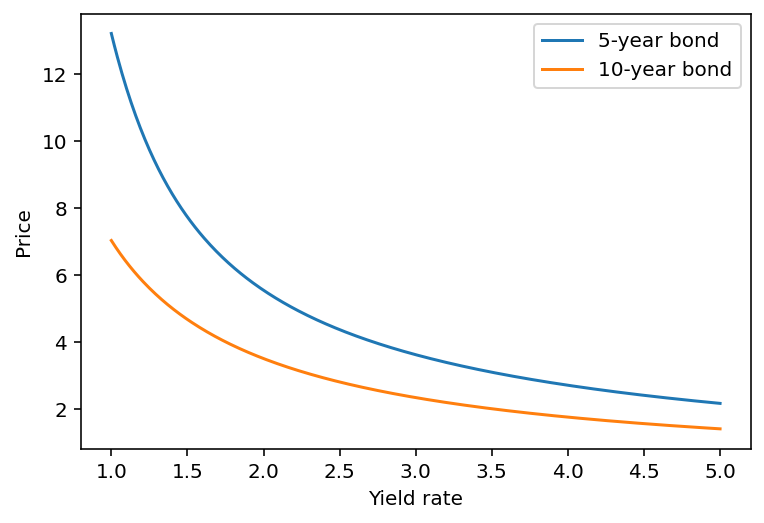

In [397]:
face_value_5 = 150
face_value_10 = 100
coupon_rate_5 = 0.036
coupon_rate_10 = 0.035
coupon_payments = 2
years_5 = 5
years_10 = 10

# assume the rate is from 1% to 5% with increments
yield_rates = [i/100 for i in range(100, 501)]

prices_5 = []
prices_10 = []

for rate in yield_rates:
    r = rate / coupon_payments
    n_5 = years_5 * coupon_payments
    n_10 = years_10 * coupon_payments

    price_5 = (coupon_rate_5 * face_value_5 / r) * (1 - 1 / (1 + r)**n_5) + face_value_5 / (1 + r)**n_5
    price_10 = (coupon_rate_10 * face_value_10 / r) * (1 - 1 / (1 + r)**n_10) + face_value_10 / (1 + r)**n_10
    
    prices_5.append(price_5)
    prices_10.append(price_10)

plt.plot(yield_rates, prices_5, label='5-year bond')
plt.plot(yield_rates, prices_10, label='10-year bond')
plt.xlabel('Yield rate')
plt.ylabel('Price')
plt.legend()
plt.show()